In [9]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

In [10]:
def checkfilepath(filepath):
    return os.path.exists(filepath)

def read_nifti_file(filepath):
    scan = nib.load(filepath)
    data = scan.get_fdata()
    return data

def normalize(volume):
    dmin = np.amin(volume)
    dmax = np.amax(volume)
    davg = np.average(volume)
    volume = (volume-dmin)/davg
    return volume

def process_scan(path):
    vol = read_nifti_file(path)
    vol = normalize(vol)
    return vol


In [12]:
df = pd.read_excel('/lfs1/ashaji/Imputation_Problem/data/ADNI_final.xlsx', engine='openpyxl')
df['SubjID'].replace('',np.nan,inplace=True)
df['AGE_at_scan'].replace('',np.nan,inplace=True)
df.dropna(subset=['SubjID','AGE_at_scan'], inplace=True)
df = df.reset_index(drop=True)
df.loc[df['SEX']=='M','SEX'] = 1
df.loc[df['SEX']=='F','SEX'] = 0
condCN = df['DX'] == 'CN'
df = df.sort_values(by = ['SubjID'])
df = df.loc[condCN,:]
# df = df.sample(frac = 1)
df = df.reset_index(drop=True)

In [13]:
df['SEX'].replace('',np.nan,inplace=True)
df['CDRSB'].replace('',np.nan,inplace=True)
df['ADAS11'].replace('',np.nan,inplace=True)
df['ADAS13'].replace('',np.nan,inplace=True)
df['MMSE'].replace('',np.nan,inplace=True)
df['MOCA'].replace('',np.nan,inplace=True)
df['APOE A1'].replace('',np.nan,inplace=True)
df['APOE A2'].replace('',np.nan,inplace=True)
# df.dropna(subset=['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2'], inplace=True)

In [14]:
cond = [checkfilepath(str(x)) for x in df['ACCEL_DL_6DOF_2MM_T1']]
cond0 = df['ACCEL_Preprocessed for DL?']=='yes'

In [15]:
conddwi = [checkfilepath(str(x)) for x in df['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']]

In [16]:
cond2 = df['SEX'].isnull()
cond2 = np.invert(cond2)
cond3 = df['CDRSB'].isnull()
cond3 = np.invert(cond3)
cond4 = df['ADAS11'].isnull()
cond4 = np.invert(cond4)
cond5 = df['ADAS13'].isnull()
cond5 = np.invert(cond5)
cond6 = df['MMSE'].isnull()
cond6 = np.invert(cond6)
cond7 = df['MOCA'].isnull()
cond7 = np.invert(cond7)
cond8 = df['APOE A1'].isnull()
cond8 = np.invert(cond8)
cond9 = df['APOE A2'].isnull()
cond9 = np.invert(cond9)

In [17]:
condt1 = [cond[i] & cond0[i]  for i in range(len(cond))]

In [18]:
condstr = cond2 & cond3 & cond4 & cond5 & cond6 & cond7 & cond8 & cond9

In [19]:
len(condstr)

3288

In [20]:
t1dwistr = df.loc[[(condt1[i] and conddwi[i] and condstr[i]) for i in range(len(condt1))]  , :]
len(t1dwistr)

458

In [21]:
t1dwi_str = df.loc[[(condt1[i] and not conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str)

1255

In [22]:
t1dwi_str_ = df.loc[[(condt1[i] and not conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str_)

329

In [23]:
t1_dwi_str = df.loc[[(not condt1[i] and not conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwi_str)

107

In [24]:
t1dwistr_ = df.loc[[(condt1[i] and conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwistr_)

74

In [25]:
t1_dwistr_ = df.loc[[(not condt1[i] and conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwistr_)

0

In [26]:
t1_dwistr = df.loc[[(not condt1[i] and conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwistr)

13

In [27]:
t1dwi_str_ = df.loc[[(condt1[i] and not conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str_)

329

In [28]:
df = df.reset_index(drop=True)
df.head(20)

,SubjID,RID,NONACCEL_T1_SCAN_FILENAME,NONACCEL_T1_IMAGEID,NONACCEL_Path to RAW nifti,NONACCEL_Preprocessed for DL?,NONACCEL_DL_6DOF_2MM_T1,NONACCEL_DL_6DOF_2MM_MASK,NONACCEL_DL_6DOF_2MM_GM,NONACCEL_DL_6DOF_2MM_WM,...,DWI_Matched_File_L1_Path_ENIGMATBSSspace,DWI_Matched_File_MD_Path_ENIGMATBSSspace,DWI_Matched_File_RD_Path_ENIGMATBSSspace,T1_Path_ENIGMATBSSspace,DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_L1_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_MD_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_RD_Path_ENIGMATBSSspace_2MM,T1_Path_ENIGMATBSSspace_2MM,DWI Preprocessing Pipeline (old=ADNI2 - new=ADNI3)
0,002_S_0295,295,002_S_0295_20060418_A1_T1_1.5T_nonaccel_Preproc,45108.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002_S_0295,295,002_S_0295_20061102_A1_T1_1.5T_nonaccel_Preproc,40966.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002_S_0295,295,002_S_0295_20070525_A1_T1_1.5T_nonaccel_Preproc,64025.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002_S_0295,295,002_S_0295_20080723_A1_T1_1.5T_nonaccel_Preproc,123685.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002_S_0295,295,002_S_0295_20090522_A1_T1_1.5T_nonaccel_Preproc,150177.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,002_S_0295,295,002_S_0295_20100513_A1_T1_1.5T_nonaccel_Preproc,291869.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,002_S_0295,295,002_S_0295_20110602_A2_T1_3T_nonaccel_Preproc,241350.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,002_S_0295,295,002_S_0295_20120510_A2_T1_3T_nonaccel_Preproc,308078.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,002_S_0413,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/

In [29]:
import nibabel as nib
from tensorflow import keras
from tensorflow.keras import layers
import random as pyrandom
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory

import nibabel as nib
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, auc, roc_auc_score
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "4"

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [30]:
### Hyperparameter config

init_lr = 1e-4
epochs = 50
early_stop = 100
seed = 53
drop_out = 0.5
weight_decay = 1e-4

batch_size=4
test_batch_size=4

In [31]:
def getCNN(width = 91,height = 109, depth = 91):
    
    def conv_block(inp,filt,name):
        inp = tf.keras.layers.Conv3D(filt,3,strides=1,padding='same')(inp)
        inp = tfa.layers.InstanceNormalization(center=False,scale=False)(inp)
        inp = tf.keras.layers.MaxPooling3D(2,strides=2,padding = 'valid')(inp)
        inp = tf.nn.relu(inp)
        return inp
    
    img0 = tf.keras.Input((91,109,91,1),name='inp0')
    inp0 = conv_block(img0,32,'conv_block1')
    inp0 = conv_block(inp0,64,'conv_block2')
    inp0 = conv_block(inp0,128,'conv_block3')
    inp0 = conv_block(inp0,256,'conv_block4')
    inp0 = conv_block(inp0,256,'conv_block5')
    
    ##LAST LAYER
    
    inp0 = tf.keras.layers.Conv3D(64,1,strides=1,padding='same')(inp0)
    inp0 = tfa.layers.InstanceNormalization(center=False,scale=False)(inp0)
    inp0 = tf.nn.relu(inp0)
    inp0 = tf.keras.layers.AveragePooling3D(2,2,'valid')(inp0)
    
    inp0 = tf.keras.layers.Dropout(rate=0.5,name='drop0')(inp0)
    
    out0 = tf.keras.layers.Flatten(name='flatten1')(inp0)
    
    ######################
    
    img1 = tf.keras.Input((91,109,91,1),name='inp1')
    inp1 = conv_block(img1,32,'conv_block11')
    inp1 = conv_block(inp1,64,'conv_block12')
    inp1 = conv_block(inp1,128,'conv_block13')
    inp1 = conv_block(inp1,256,'conv_block14')
    inp1 = conv_block(inp1,256,'conv_block15')
    
    ##LAST LAYER
    
    inp1 = tf.keras.layers.Conv3D(64,1,strides=1,padding='same')(inp1)
    inp1 = tfa.layers.InstanceNormalization(center=False,scale=False)(inp1)
    inp1 = tf.nn.relu(inp1)
    inp1 = tf.keras.layers.AveragePooling3D(2,2,'valid')(inp1)
    
    inp1 = tf.keras.layers.Dropout(rate=0.5,name='drop2')(inp1)
    
    out1 = tf.keras.layers.Flatten(name='flatten2')(inp1)
    
    concat = tf.keras.layers.Concatenate()([out0,out1])
    outx = tf.keras.layers.Dense(units=64,activation='relu')(concat)
    outx = tf.keras.layers.Dense(units=32,activation='relu')(outx)
    out2 = tf.keras.layers.Dense(units=1,name='age')(outx)
    
    model = keras.Model([img0,img1],out2,name='3DCNN_Metis_T1andDWI')
    return model

model = getCNN()
model.summary()
    

Model: "3DCNN_Metis_T1andDWI"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp0 (InputLayer)              [(None, 91, 109, 91  0           []                               
                                , 1)]                                                             
                                                                                                  
 inp1 (InputLayer)              [(None, 91, 109, 91  0           []                               
                                , 1)]                                                             
                                                                                                  
 conv3d_12 (Conv3D)             (None, 91, 109, 91,  896         ['inp0[0][0]']                   
                                 32)                                           

                                                                                                  
 conv3d_21 (Conv3D)             (None, 11, 13, 11,   884992      ['tf.nn.relu_20[0][0]']          
                                256)                                                              
                                                                                                  
 instance_normalization_15 (Ins  (None, 11, 13, 11,   0          ['conv3d_15[0][0]']              
 tanceNormalization)            256)                                                              
                                                                                                  
 instance_normalization_21 (Ins  (None, 11, 13, 11,   0          ['conv3d_21[0][0]']              
 tanceNormalization)            256)                                                              
                                                                                                  
 max_pooli

 age (Dense)                    (None, 1)            33          ['dense_3[0][0]']                
                                                                                                  
Total params: 5,907,841
Trainable params: 5,907,841
Non-trainable params: 0
__________________________________________________________________________________________________


In [32]:
t1dwi = df.loc[[(condt1[i] and conddwi[i]) for i in range(len(condt1))]  , :]

In [33]:
len(t1dwi)

532

In [34]:
train = t1dwi.drop(t1dwistr.index)

In [35]:
len(train)

74

In [36]:
p = (np.ceil(0.7*len(t1dwistr))-1).astype(int)
q = (np.ceil(0.9*len(t1dwistr))-2).astype(int)
r = len(t1dwistr)
trainn = p
valn  = r - q
testn   = q - p
trainn, testn, valn
trainall = t1dwistr[:p]
testall  = t1dwistr[p:q]
valall   = t1dwistr[q:]
len(trainall), len(testall), len(valall)

(320, 91, 47)

In [37]:
datamix = [train,trainall,valall]
alltrain = pd.concat(datamix)
alltrain = alltrain.sort_values(by = ['SubjID'])

In [38]:
len(alltrain)

441

In [39]:
p = (np.ceil(0.8*len(alltrain))-1).astype(int)
q = len(alltrain)
trainn = p
# valn  = r - q
valn   = q - p
trainn, valn, trainn + valn

(352, 89, 441)

In [40]:
trainds = alltrain[:p]
valds   = alltrain[p:]
len(trainds),len(valds)

(352, 89)

In [41]:
os.getpid()

28753

In [45]:
for i in trainds['SubjID']:
    for j in testall['SubjID']:
        if i==j:
            print(i)

/tmp/ipykernel_19070/1918704807.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=trainds.AGE_at_scan, hist=False)
/tmp/ipykernel_19070/1918704807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testall.AGE_at_scan, hist=False)


<Axes: xlabel='AGE_at_scan', ylabel='Density'>

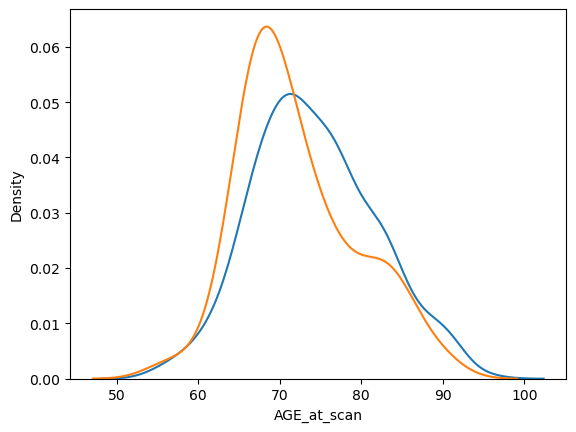

In [35]:
import seaborn as sns
sns.distplot(a=trainds.AGE_at_scan, hist=False)
sns.distplot(a=testall.AGE_at_scan, hist=False)

In [46]:
class DataGenerator(tf.keras.utils.Sequence):
    def printx(self):
        print(len(self.data))
        return 
    
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        if(self.isTrain):
            vol1 = self.rotate(vol)
            vol1 = tf.expand_dims(vol1,axis=3)
        else:
            vol1 = tf.expand_dims(vol,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self, data, batch_size, sample_weights=None,isTrain=True):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights
        self.isTrain = isTrain

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_dwi])
        ####
        return ([t1_imgs,dwi_imgs], np.array(batch_y))
    
    def on_epoch_end(self):
        if(self.isTrain):
            self.data = self.data.sample(frac=1)

In [47]:
dg_testall = DataGenerator(testall,4,isTrain=False)

In [48]:
dg_train = DataGenerator(trainds,4)
dg_val = DataGenerator(valds,4,isTrain=False)

In [50]:
def checkTestAll(testall = testall):
    file = open('/lfs1/ashaji/Imputation_Problem/organized/DST/tester.txt','r')
    x = ''
    for i in testall['SubjID']:
        x += str(i+'\n')
    print(x==file.read())
checkTestAll()

True


In [51]:
len(trainds),len(valds),len(testall)

(352, 89, 91)

In [52]:
model.compile(
    loss='mse',
    optimizer = keras.optimizers.AdamW(learning_rate=1e-3,weight_decay=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse'),tf.keras.metrics.MeanAbsoluteError(name='mae')]   
)
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)
history = model.fit(
    dg_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI')

/tmp/ipykernel_28753/2179794019.py:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


2023-12-25 13:21:32.141021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-25 13:21:37.782928: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-12-25 13:21:39.013978: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fad78021940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-25 13:21:39.014054: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2023-12-25 13:21:39.025238: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-25 13:21:39.

88/88 [==============================] - ETA: 0s - loss: 2150.4651 - rmse: 46.3731 - mae: 38.8822

2023-12-25 13:23:53.439481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


88/88 [==============================] - 151s 2s/step - loss: 2150.4651 - rmse: 46.3731 - mae: 38.8822 - val_loss: 55.2509 - val_rmse: 7.4331 - val_mae: 6.2016
Epoch 2/200
88/88 [==============================] - 141s 2s/step - loss: 121.5648 - rmse: 11.0256 - mae: 8.8992 - val_loss: 39.3909 - val_rmse: 6.2762 - val_mae: 5.0277
Epoch 3/200
88/88 [==============================] - 141s 2s/step - loss: 129.9151 - rmse: 11.3980 - mae: 9.0384 - val_loss: 38.1636 - val_rmse: 6.1777 - val_mae: 4.9473
Epoch 4/200
88/88 [==============================] - 137s 2s/step - loss: 106.7442 - rmse: 10.3317 - mae: 8.3071 - val_loss: 37.4672 - val_rmse: 6.1210 - val_mae: 4.9463
Epoch 5/200
88/88 [==============================] - 139s 2s/step - loss: 120.0781 - rmse: 10.9580 - mae: 8.7172 - val_loss: 38.6303 - val_rmse: 6.2153 - val_mae: 5.1477
Epoch 6/200
88/88 [==============================] - 138s 2s/step - loss: 100.7274 - rmse: 10.0363 - mae: 8.0044 - val_loss: 46.1562 - val_rmse: 6.7938 - val_ma

88/88 [==============================] - 140s 2s/step - loss: 45.4327 - rmse: 6.7404 - mae: 5.3781 - val_loss: 19.1910 - val_rmse: 4.3808 - val_mae: 3.6752
Epoch 50/200
88/88 [==============================] - 141s 2s/step - loss: 51.3624 - rmse: 7.1668 - mae: 5.6799 - val_loss: 21.2342 - val_rmse: 4.6081 - val_mae: 3.7726
Epoch 51/200
88/88 [==============================] - 141s 2s/step - loss: 54.2909 - rmse: 7.3682 - mae: 5.8011 - val_loss: 16.4577 - val_rmse: 4.0568 - val_mae: 3.4573
Epoch 52/200
88/88 [==============================] - 139s 2s/step - loss: 50.9024 - rmse: 7.1346 - mae: 5.7777 - val_loss: 39.2715 - val_rmse: 6.2667 - val_mae: 5.1387
Epoch 53/200
88/88 [==============================] - 141s 2s/step - loss: 51.0723 - rmse: 7.1465 - mae: 5.7280 - val_loss: 20.0388 - val_rmse: 4.4765 - val_mae: 3.6622
Epoch 54/200
88/88 [==============================] - 140s 2s/step - loss: 46.3159 - rmse: 6.8056 - mae: 5.3230 - val_loss: 25.7099 - val_rmse: 5.0705 - val_mae: 3.9771

2023-12-25 16:07:44.555149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-25 16:07:44.564474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-25 16:07:46.230167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI/assets


In [53]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI')

In [55]:
model.evaluate(dg_testall)

/tmp/ipykernel_28753/2179794019.py:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-26 15:01:49.088024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 29s 1s/step - loss: 31.1748 - rmse: 5.5834 - mae: 4.4291


[31.174806594848633, 5.58344030380249, 4.42907190322876]

In [56]:
############# IMPUTATION TECHNIQUE 0 ##################

In [57]:
class DataGeneratorImpT1(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        if(self.isTrain):
            vol1 = self.rotate(vol)
            vol1 = tf.expand_dims(vol1,axis=3)
        else:
            vol1 = tf.expand_dims(vol,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume
    
    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __init__(self, data, batch_size, sample_weights=None,isTrain=True):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights
        self.isTrain = isTrain

    def __getitem__(self, idx):
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi = []
        for i in batch_dwi:
            if pd.isnull(i):
                dwi.append(avgMRI)
            else:
                dwi.append((self.read_scan(i)))
        dwi_imgs = np.asarray([self.preprocessing(img) for img in dwi])
        return ([t1_imgs,dwi_imgs], np.array(batch_y))
    
    def on_epoch_end(self):
        if(self.isTrain):
            self.data = self.data.sample(frac=1)

In [60]:
t1_dwi = df.loc[[(not condt1[i] and conddwi[i]) for i in range(len(condt1))] , :]
avg = [t1_dwi,trainds]
avgCN = pd.concat(avg)

In [86]:
len(avgCN)

365

In [59]:
testCount = 0
testArr = []
for i in testall['SubjID'].drop_duplicates():
    testArr.append(i)
    testCount += 1
testCount

82

In [62]:
for i in testArr:
    avgCN.drop(avgCN[(avgCN['SubjID']==i) ].index,inplace = True)

In [64]:
for i in avgCN['SubjID'].drop_duplicates():
    for j in valds['SubjID'].drop_duplicates():
        if i == j:
            print(i)

In [65]:
def read_scan(path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

avgMRI = np.zeros((91,109,91))

for i in avgCN['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']:
    avgMRI += read_scan(i)
    
avgMRI = normalize(avgMRI)

In [46]:
len(trainds),len(alltrain[:p])

(352, 352)

In [73]:
os.getpid()

19070

In [66]:
t1dwi_ = df.loc[[(condt1[i] and not conddwi[i]) for i in range(len(condt1))] , :]
train1 = [t1dwi_,trainds]
train1 = pd.concat(train1)

In [77]:
len(train1)

1744

In [81]:
count = 0
arr = []
for i in train1['SubjID']:
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
            arr.append(i)
            count += 1
count

0

In [75]:
for i in arr:
    train1.drop(train1[(train1['SubjID']==i) ].index,inplace = True)

In [78]:
dg1_train = DataGeneratorImpT1(train1,batch_size,isTrain=True)

In [79]:
len(train1),len(valds),len(testall)

(1744, 89, 91)

In [82]:
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI')

2023-12-26 17:32:41.322678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-26 17:32:41.331576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-26 17:32:42.843124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI/assets


In [83]:
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)
history = model.fit(
    dg1_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIavgImp')

/tmp/ipykernel_28753/2179794019.py:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_28753/897808007.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-26 17:33:54.520025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


436/436 [==============================] - ETA: 0s - loss: 57.0490 - rmse: 7.5531 - mae: 5.9957

2023-12-26 17:46:43.268018: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


436/436 [==============================] - 784s 2s/step - loss: 57.0490 - rmse: 7.5531 - mae: 5.9957 - val_loss: 25.6764 - val_rmse: 5.0672 - val_mae: 4.1029
Epoch 2/200
436/436 [==============================] - 615s 1s/step - loss: 50.6575 - rmse: 7.1174 - mae: 5.6213 - val_loss: 47.0860 - val_rmse: 6.8619 - val_mae: 5.6688
Epoch 3/200
436/436 [==============================] - 605s 1s/step - loss: 51.9688 - rmse: 7.2089 - mae: 5.6722 - val_loss: 18.9376 - val_rmse: 4.3517 - val_mae: 3.5125
Epoch 4/200
436/436 [==============================] - 608s 1s/step - loss: 46.0636 - rmse: 6.7870 - mae: 5.3884 - val_loss: 17.8909 - val_rmse: 4.2298 - val_mae: 3.4313
Epoch 5/200
436/436 [==============================] - 607s 1s/step - loss: 40.4578 - rmse: 6.3606 - mae: 5.0634 - val_loss: 19.3548 - val_rmse: 4.3994 - val_mae: 3.6086
Epoch 6/200
436/436 [==============================] - 603s 1s/step - loss: 39.8653 - rmse: 6.3139 - mae: 5.0123 - val_loss: 19.2769 - val_rmse: 4.3905 - val_mae:

2023-12-26 22:23:58.662755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-26 22:23:58.671637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-26 22:24:00.332255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIavgImp/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIavgImp/assets


In [84]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIavgImp')

In [122]:
model.evaluate(dg_testall)

/tmp/ipykernel_28753/2179794019.py:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 15:56:45.118199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 18s 815ms/step - loss: 32.0016 - rmse: 5.6570 - mae: 4.4098


[32.00159454345703, 5.6569952964782715, 4.409799575805664]

In [75]:
os.getpid()

19070

In [87]:
## IMPUTATION 2

In [117]:
def read_scan(path):
        scan = nib.load(str(path))
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    if max == 0 and min == 0:
        return vol
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

def avgMRI(avg):  
    avgMRI = np.zeros((91,109,91))
    if avg.empty:
        return avgMRI
    for i in avg['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']:
        avgMRI += read_scan(i)
    return normalize(avgMRI)

avg0x = avgCN[(avgCN['AGE_at_scan'] >= 40) & (avgCN['AGE_at_scan'] < 45)]
avg1x = avgCN[(avgCN['AGE_at_scan'] >= 45) & (avgCN['AGE_at_scan'] < 50)]
avg2x = avgCN[(avgCN['AGE_at_scan'] >= 50) & (avgCN['AGE_at_scan'] < 55)]
avg3x = avgCN[(avgCN['AGE_at_scan'] >= 55) & (avgCN['AGE_at_scan'] < 60)]
avg4x = avgCN[(avgCN['AGE_at_scan'] >= 60) & (avgCN['AGE_at_scan'] < 65)]
avg5x = avgCN[(avgCN['AGE_at_scan'] >= 65) & (avgCN['AGE_at_scan'] < 70)]
avg6x = avgCN[(avgCN['AGE_at_scan'] >= 70) & (avgCN['AGE_at_scan'] < 75)]
avg7x = avgCN[(avgCN['AGE_at_scan'] >= 75) & (avgCN['AGE_at_scan'] < 80)]
avg8x = avgCN[(avgCN['AGE_at_scan'] >= 80) & (avgCN['AGE_at_scan'] < 85)]
avg9x = avgCN[(avgCN['AGE_at_scan'] >= 85) & (avgCN['AGE_at_scan'] < 90)]
avg10x = avgCN[(avgCN['AGE_at_scan'] >= 90) & (avgCN['AGE_at_scan'] < 95)]
avg11x = avgCN[(avgCN['AGE_at_scan'] >= 95) & (avgCN['AGE_at_scan'] < 100)]
print(len(avg0x),len(avg1x),len(avg2x),len(avg3x),len(avg4x),len(avg5x),len(avg6x),len(avg7x),len(avg8x),len(avg9x),len(avg10x),len(avg11x))


0 0 0 9 23 80 94 74 56 19 9 1


In [118]:
avg0 = avgMRI(avg0x)
avg1 = avgMRI(avg1x)
avg2 = avgMRI(avg2x)
avg3 = avgMRI(avg3x)
avg4 = avgMRI(avg4x)
avg5 = avgMRI(avg5x)
avg6 = avgMRI(avg6x)
avg7 = avgMRI(avg7x)
avg8 = avgMRI(avg8x)
avg9 = avgMRI(avg9x)
avg10 = avgMRI(avg10x)
avg11 = avgMRI(avg11x)

In [128]:
class DataGeneratorMRIs(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def returnAvg(self,age):
        if age>=40 and age < 45:
            return avg0
        elif age>=45 and age < 50:
            return avg1
        elif age>=50 and age < 55:
            return avg2
        elif age>=55 and age < 60:
            return avg3
        elif age>=60 and age < 65:
            return avg4
        elif age>=65 and age < 70:
            return avg5
        elif age>=70 and age < 75:
            return avg6
        elif age>=75 and age < 80:
            return avg7
        elif age>=80 and age < 85:
            return avg8
        elif age>=85 and age < 90:
            return avg9
        elif age>=90 and age < 95:
            return avg10
        elif age>=95 and age < 100:
            return avg11
        
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self,data, batch_size, sample_weights=None):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        dwi = []
        for i in range(len(batch_dwi)):
            if pd.isnull(batch_dwi[i]):
                dwi.append(self.returnAvg(batch_y.iloc[i]))
            else:
                dwi.append((self.read_scan(batch_dwi[i])))
                
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi_imgs = np.asarray([self.preprocessing(img) for img in dwi])
        
        return ([t1_imgs,dwi_imgs], np.array(batch_y))
    
    def on_epoch_end(self):
        self.data = self.data.sample(frac=1)

In [129]:
dg2_train = DataGeneratorMRIs(train1,batch_size)

In [136]:
for i in avgCN['SubjID']:
    for j in testall['SubjID']:
        if(i==j):
            print(i)

In [130]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/modelT1andDWI')
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)
history = model.fit(
    dg2_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIbuckavgImp')

/tmp/ipykernel_28753/2179794019.py:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_28753/3282186693.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 15:59:22.792203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


436/436 [==============================] - ETA: 0s - loss: 33.1198 - rmse: 5.7550 - mae: 4.5527

2023-12-27 16:10:02.759221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


436/436 [==============================] - 653s 1s/step - loss: 33.1198 - rmse: 5.7550 - mae: 4.5527 - val_loss: 18.6741 - val_rmse: 4.3213 - val_mae: 3.5923
Epoch 2/200
436/436 [==============================] - 623s 1s/step - loss: 26.5548 - rmse: 5.1531 - mae: 4.0688 - val_loss: 21.9824 - val_rmse: 4.6885 - val_mae: 3.8182
Epoch 3/200
436/436 [==============================] - 649s 1s/step - loss: 22.7790 - rmse: 4.7727 - mae: 3.8473 - val_loss: 24.6551 - val_rmse: 4.9654 - val_mae: 3.9493
Epoch 4/200
436/436 [==============================] - 646s 1s/step - loss: 18.8914 - rmse: 4.3464 - mae: 3.4429 - val_loss: 21.7351 - val_rmse: 4.6621 - val_mae: 3.9674
Epoch 5/200
436/436 [==============================] - 641s 1s/step - loss: 15.4774 - rmse: 3.9341 - mae: 3.0638 - val_loss: 23.7519 - val_rmse: 4.8736 - val_mae: 4.0357
Epoch 6/200
436/436 [==============================] - 655s 2s/step - loss: 11.9201 - rmse: 3.4526 - mae: 2.6747 - val_loss: 21.7796 - val_rmse: 4.6669 - val_mae:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



436/436 [==============================] - 624s 1s/step - loss: 5.8715 - rmse: 2.4231 - mae: 1.8510 - val_loss: 20.8291 - val_rmse: 4.5639 - val_mae: 3.7441
Epoch 21/200
436/436 [==============================] - 619s 1s/step - loss: 5.8201 - rmse: 2.4125 - mae: 1.8598 - val_loss: 24.1968 - val_rmse: 4.9190 - val_mae: 4.0786
Epoch 22/200
436/436 [==============================] - 622s 1s/step - loss: 5.2549 - rmse: 2.2924 - mae: 1.7490 - val_loss: 20.5412 - val_rmse: 4.5322 - val_mae: 3.7831
Epoch 23/200
436/436 [==============================] - 632s 1s/step - loss: 5.0639 - rmse: 2.2503 - mae: 1.7284 - val_loss: 18.7839 - val_rmse: 4.3340 - val_mae: 3.5533
Epoch 24/200
436/436 [==============================] - 627s 1s/step - loss: 5.3506 - rmse: 2.3131 - mae: 1.7622 - val_loss: 19.8467 - val_rmse: 4.4550 - val_mae: 3.7066
Epoch 25/200
436/436 [==============================] - 620s 1s/step - loss: 4.5718 - rmse: 2.1382 - mae: 1.6410 - val_loss: 28.1890 - val_rmse: 5.3093 - val_mae: 

2023-12-27 21:25:39.526985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-27 21:25:39.536058: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-27 21:25:41.573150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2

INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIbuckavgImp/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIbuckavgImp/assets


In [132]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/T1andDWI/T1andDWIbuckavgImp')

In [133]:
model.evaluate(dg_testall)

/tmp/ipykernel_28753/2179794019.py:41: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 21:29:00.779969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 10s 388ms/step - loss: 24.2825 - rmse: 4.9277 - mae: 3.8811


[24.282470703125, 4.927724838256836, 3.881133794784546]

In [ ]:
os.getpid()

In [ ]:
len(dg_testall)

In [ ]:
len(testall)